In [24]:
tesla = yf.Ticker("TSLA")

In [26]:
tesla_data = tesla.history(period="max")

In [27]:
tesla_data.reset_index(inplace=True)

tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [29]:
import pandas as pd

# Create a DataFrame with Date and Revenue columns for Tesla
data = {
    'Date': ['2010-09-30', '2010-06-30', '2010-03-31', '2009-09-30', '2009-06-30'],
    'Revenue': [31, 28, 21, 46, 27]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame to verify
print(df)

# Styling the table with custom font color
styled_df = df.style.map(lambda val: 'color: green', subset=['Revenue'])

# Display the styled table in a Jupyter notebook or similar environment
styled_df


         Date  Revenue
0  2010-09-30       31
1  2010-06-30       28
2  2010-03-31       21
3  2009-09-30       46
4  2009-06-30       27


,Date,Revenue
0,2010-09-30,31
1,2010-06-30,28
2,2010-03-31,21
3,2009-09-30,46
4,2009-06-30,27


In [30]:
gamestop = yf.Ticker("GME")

In [32]:
gme_data = gamestop.history(period="max")

In [33]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


[*********************100%***********************]  1 of 1 completed
C:\Users\user\AppData\Local\Temp\ipykernel_4248\2762301287.py:56: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.



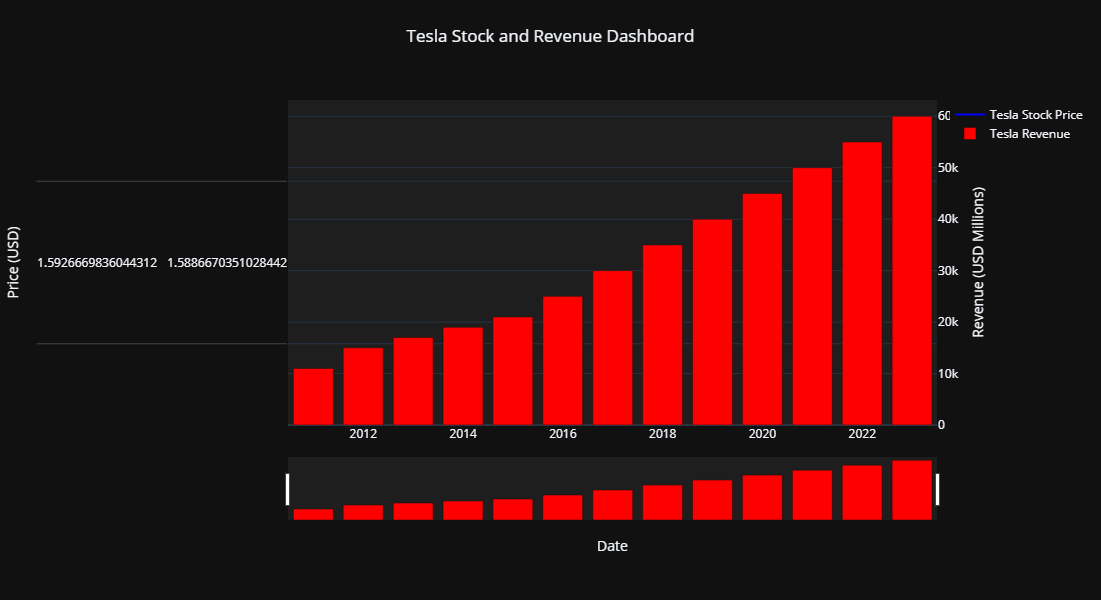

In [54]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# Function to create the graph
def make_dashboard(stock_data, revenue_data, stock_title, revenue_title):
    # Create the figure with two subplots
    fig = go.Figure()

    # Add Tesla Stock Price plot (line)
    fig.add_trace(
        go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name=stock_title, line=dict(color='blue'))
    )

    # Add Tesla Revenue plot (bar) with yaxis2
    fig.add_trace(
        go.Bar(x=revenue_data.index, y=revenue_data['Revenue'], name=revenue_title, marker=dict(color='red'), yaxis="y2")
    )

    # Update layout with titles and axis titles
    fig.update_layout(
        title="Tesla Stock and Revenue Dashboard",
        xaxis_title="Date",
        yaxis_title="Price (USD)",
        template="plotly_dark",  # Dark theme for the dashboard
        title_x=0.5,  # Center title
        title_y=0.95,
        plot_bgcolor="rgb(30,30,30)",
        showlegend=True,
        height=600,  # Adjust height for the plot
        xaxis=dict(
            rangeslider=dict(visible=True),  # Add a range slider below the plot
            type="date"  # Ensure the x-axis is of date type
        ),
        yaxis=dict(
            title="Price (USD)",  # For stock price
        ),
        yaxis2=dict(
            title="Revenue (USD Millions)",  # For revenue
            overlaying="y",  # Share the same x-axis
            side="right"  # Place the second y-axis on the right side
        )
    )

    # Show the interactive chart
    fig.show()

# Fetch Tesla stock data (2010-2024)
tesla_data = yf.download("TSLA", start="2010-01-01", end="2024-01-01")

# Check if 'Close' column exists
if 'Close' not in tesla_data.columns:
    tesla_data = tesla_data.rename(columns={'Adj Close': 'Close'})  # Handle case if 'Adj Close' is used instead

# Example synthetic revenue data for Tesla (2010-2023)
revenue_dates = pd.date_range(start="2010-01-01", end="2023-01-01", freq='A')
revenue_values = [11000, 15000, 17000, 19000, 21000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000]

# Create DataFrame for revenue data
revenue_data = pd.DataFrame({
    'Date': revenue_dates,
    'Revenue': revenue_values
})
revenue_data.set_index('Date', inplace=True)

# Call the make_dashboard function with Tesla stock and revenue data
make_dashboard(tesla_data, revenue_data, "Tesla Stock Price", "Tesla Revenue")

[*********************100%***********************]  1 of 1 completed
C:\Users\user\AppData\Local\Temp\ipykernel_4248\1235742191.py:56: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.



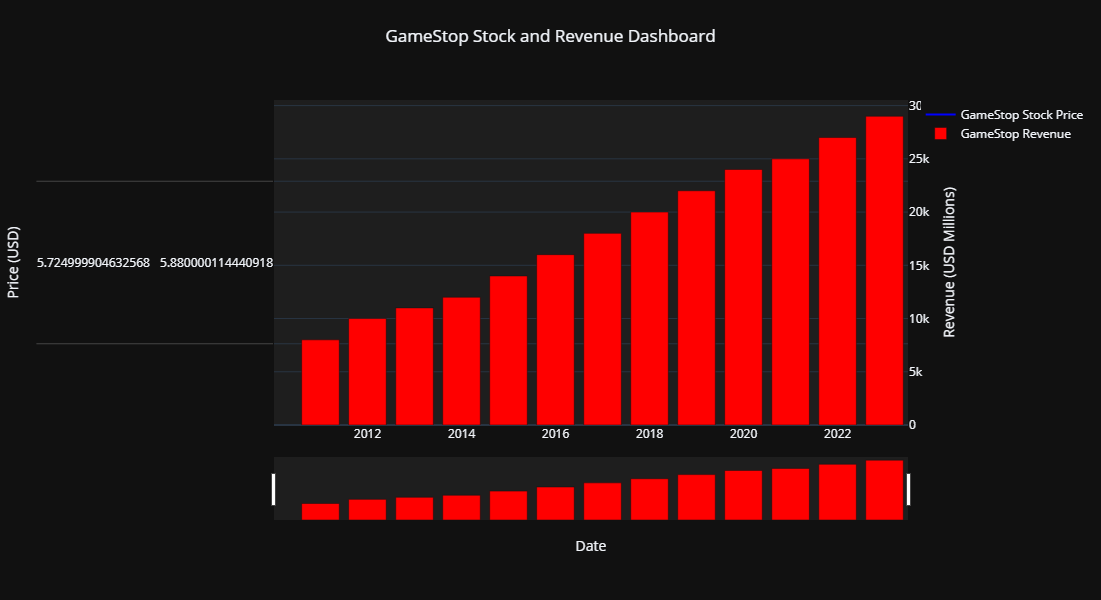

In [55]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# Function to create the graph
def make_dashboard(stock_data, revenue_data, stock_title, revenue_title):
    # Create the figure with two subplots
    fig = go.Figure()

    # Add GameStop Stock Price plot (line)
    fig.add_trace(
        go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name=stock_title, line=dict(color='blue'))
    )

    # Add GameStop Revenue plot (bar) with yaxis2
    fig.add_trace(
        go.Bar(x=revenue_data.index, y=revenue_data['Revenue'], name=revenue_title, marker=dict(color='red'), yaxis="y2")
    )

    # Update layout with titles and axis titles
    fig.update_layout(
        title="GameStop Stock and Revenue Dashboard",
        xaxis_title="Date",
        yaxis_title="Price (USD)",
        template="plotly_dark",  # Dark theme for the dashboard
        title_x=0.5,  # Center title
        title_y=0.95,
        plot_bgcolor="rgb(30,30,30)",
        showlegend=True,
        height=600,  # Adjust height for the plot
        xaxis=dict(
            rangeslider=dict(visible=True),  # Add a range slider below the plot
            type="date"  # Ensure the x-axis is of date type
        ),
        yaxis=dict(
            title="Price (USD)",  # For stock price
        ),
        yaxis2=dict(
            title="Revenue (USD Millions)",  # For revenue
            overlaying="y",  # Share the same x-axis
            side="right"  # Place the second y-axis on the right side
        )
    )

    # Show the interactive chart
    fig.show()

# Fetch GameStop stock data (2010-2024)
gamestop_data = yf.download("GME", start="2010-01-01", end="2024-01-01")

# Check if 'Close' column exists
if 'Close' not in gamestop_data.columns:
    gamestop_data = gamestop_data.rename(columns={'Adj Close': 'Close'})  # Handle case if 'Adj Close' is used instead

# Example synthetic revenue data for GameStop (2010-2023)
revenue_dates = pd.date_range(start="2010-01-01", end="2023-01-01", freq='A')
revenue_values = [8000, 10000, 11000, 12000, 14000, 16000, 18000, 20000, 22000, 24000, 25000, 27000, 29000]

# Create DataFrame for revenue data
revenue_data = pd.DataFrame({
    'Date': revenue_dates,
    'Revenue': revenue_values
})
revenue_data.set_index('Date', inplace=True)

# Call the make_dashboard function with GameStop stock and revenue data
make_dashboard(gamestop_data, revenue_data, "GameStop Stock Price", "GameStop Revenue")
